In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipdb import set_trace
plt.rcParams.update({'font.size': 16})


In [2]:
def collectResults(results_dir, solver_names):
    R_errors_all = {}
    t_errors_all = {}
    f_errors_all = {}

    for solver_id in range(len(solver_names)):
        file_path_text = "build/" + results_dir + "/fisheye_" + solver_names[solver_id] + ".txt"
        R_errors = []
        t_errors = []
        f_errors = []

        with open(file_path_text, 'r') as file:
            for line_num, line in enumerate(file, 1):
                # line will include the newline character '\n' at the end
                # Use .strip() to remove leading/trailing whitespace, including '\n'
                cleaned_line = line.strip()

                Errors = cleaned_line.split(" ")
                if len(Errors) == 1:
                    continue

                nSols = (len(Errors) - 1) // 3
                best_R_error = float('inf')
                best_t_error = float('inf')
                best_f_error = float('inf')

                for i in range(nSols):
                    
                    R_error_temp = float(Errors[i*3])
                    t_error_temp = float(Errors[i*3+1])
                    f_error_temp = float(Errors[i*3+2])

                    if R_error_temp < best_R_error:
                        best_R_error = R_error_temp
                        best_t_error = t_error_temp
                        best_f_error = f_error_temp

                R_errors.append(best_R_error)
                t_errors.append(best_t_error)
                f_errors.append(best_f_error)

        R_errors_all[solver_names[solver_id]] = np.log10(R_errors)
        t_errors_all[solver_names[solver_id]] = np.log10(t_errors)
        f_errors_all[solver_names[solver_id]] = np.log10(f_errors)

    results = {}
    results["R_errors"] = R_errors_all
    results["t_errors"] = t_errors_all
    results["f_errors"] = f_errors_all

    return results

In [33]:
# results_dir = "build2/results_medium/fisheye_"
# results_dir = "build2/results_wide/fisheye_"

solver_names_all = ["p4pfr", "p4pfr_LM", "hc_depth_p4pfr", "hc_pose_p4pfr",
                "p35pf","p35pf_LM", "hc_depth_p35pf", "hc_pose_p35pf",
                "p4pf","p4pf_LM", "hc_depth_p4pf", "hc_pose_p4pf"]

solver_names_legend_all = ["p4pfr", "p4pfr_LM", "p4pfr_hc_depth","p4pfr_hc_pose",
                "p3.5pf","p3.5pf_LM", "p3.5pf_hc_depth","p3.5pf_hc_pose",
                "p4pf","p4pf_LM", "p4pf_hc_depth", "p4pf_hc_pose"]
solver_colors = ['skyblue', 'lightcoral', 'lightgreen', 'purple', 'orange', 'brown','green', 'red', 'orange', "green"]
curve_styles = ['-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--']
line_widths = [4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2]


# present_IDs = [0, 1, 3, 6, 7, 8, 9]
# solver_names = [solver_names[i] for i in present_IDs]
# solver_colors = [solver_colors[i] for i in present_IDs]
# solver_names_legend = [solver_names_legend[i] for i in present_IDs]

In [34]:
FoVMedium = collectResults("results_fov_75", solver_names_all)
FoVWide = collectResults("results_fov_120", solver_names_all)
# FoVMedium = collectResults("results_medium", solver_names)
# FoVWide = collectResults("results_wide", solver_names)

/tmp/ipykernel_1932307/2743919088.py:42: RuntimeWarning: divide by zero encountered in log10
  R_errors_all[solver_names[solver_id]] = np.log10(R_errors)
/tmp/ipykernel_1932307/2743919088.py:43: RuntimeWarning: divide by zero encountered in log10
  t_errors_all[solver_names[solver_id]] = np.log10(t_errors)
/tmp/ipykernel_1932307/2743919088.py:44: RuntimeWarning: divide by zero encountered in log10
  f_errors_all[solver_names[solver_id]] = np.log10(f_errors)


In [35]:
def plotErrorDistributions(results, title_prefix, solver_names, solver_names_legend, solver_colors, line_widths, curve_styles):
    nVisual = len(solver_names)
    R_errors_all = results["R_errors"]
    t_errors_all = results["t_errors"]
    f_errors_all = results["f_errors"]

    plot_title_prefix = "fisheye absolute pose and focal length benchmark " + title_prefix

    # --- Plotting Distributions (Histograms / KDEs) ---
    plt.figure(figsize=(22, 6))
    plt.suptitle(f"{plot_title_prefix} - Error Distributions", fontsize=16)

    # RError
    plt.subplot(1, 3, 1)
    for error_id in range(nVisual):
        # sns.kdeplot(data=R_errors_all[solver_names[error_id]], color=solver_colors[error_id], linewidth=line_widths[error_id], linestyle=curve_styles[error_id])
        sns.kdeplot(data=R_errors_all[solver_names[error_id]], linewidth=line_widths[error_id], linestyle=curve_styles[error_id])
    plt.title('Rotation Error')
    plt.xlabel('log10 norm')
    plt.ylabel('Density')
    plt.legend(solver_names_legend, bbox_to_anchor=(-0.8, 0.5), loc='center left')
    # plt.xlim(-9, 2)

    # tError
    plt.subplot(1, 3, 2)
    for error_id in range(nVisual):
        # sns.kdeplot(data=t_errors_all[solver_names[error_id]], color=solver_colors[error_id], linewidth=line_widths[error_id], linestyle=curve_styles[error_id])
        sns.kdeplot(data=t_errors_all[solver_names[error_id]], linewidth=line_widths[error_id], linestyle=curve_styles[error_id])
    plt.title('Translation Error')
    plt.xlabel('log10 %')
    plt.ylabel('Density')
    # plt.xlim(-5, 7)

    # fError
    plt.subplot(1, 3, 3)
    for error_id in range(nVisual):
        # sns.kdeplot(data=f_errors_all[solver_names[error_id]], color=solver_colors[error_id], linewidth=line_widths[error_id], linestyle=curve_styles[error_id])
        sns.kdeplot(data=f_errors_all[solver_names[error_id]], linewidth=line_widths[error_id], linestyle=curve_styles[error_id])
    plt.title('Focal Length Error')
    plt.xlabel('log10 %')
    plt.ylabel('Density')
    # plt.xlim(-7, 5)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

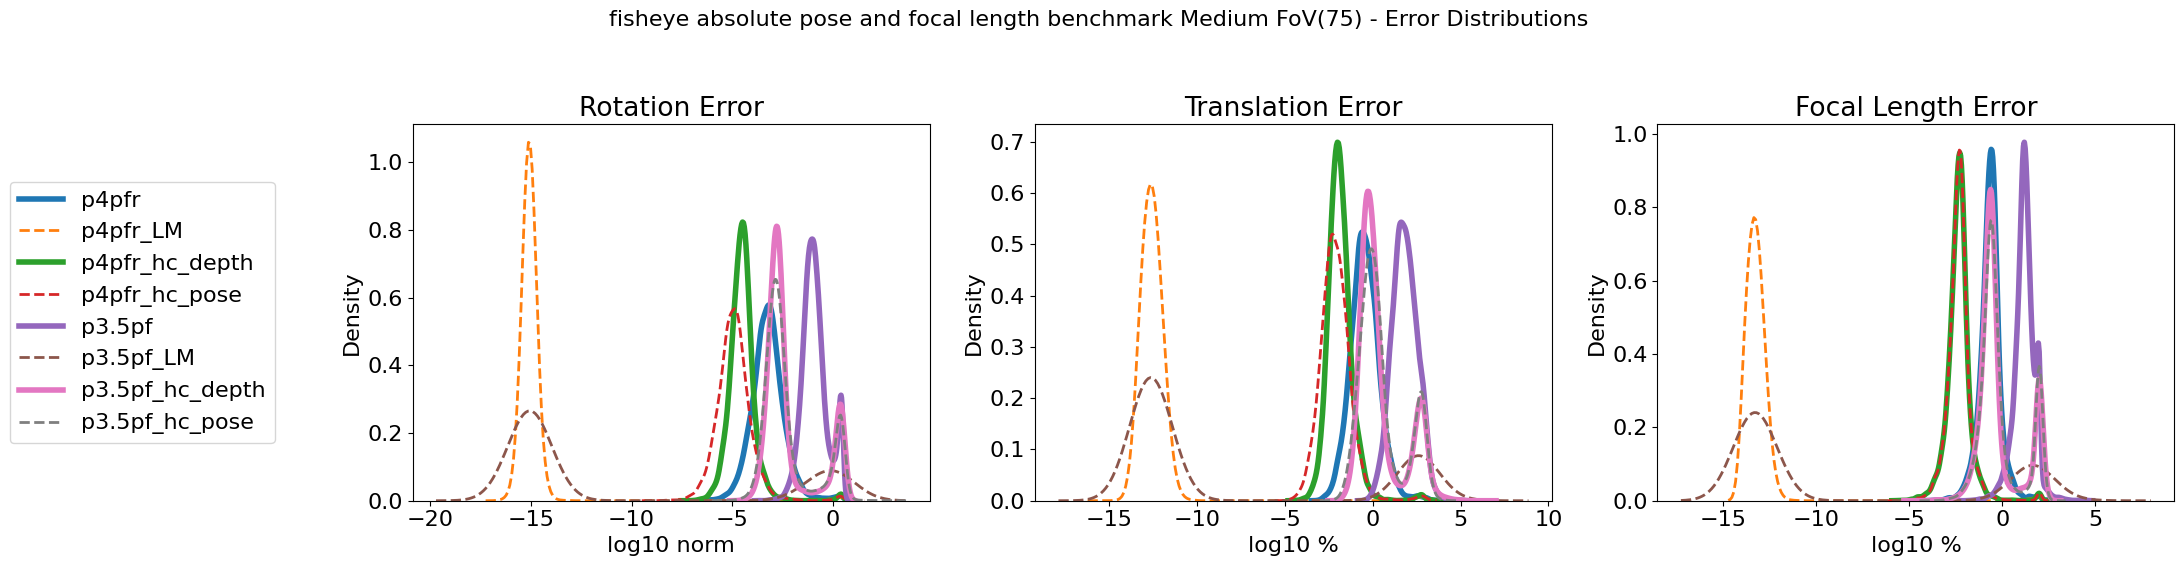

In [41]:
present_IDs = [0, 1, 2, 3, 4, 5, 6, 7]
# present_IDs = [0, 1, 2, 3]
solver_names = [solver_names_all[i] for i in present_IDs]
solver_names_legend = [solver_names_legend_all[i] for i in present_IDs]
plotErrorDistributions(FoVMedium, 'Medium FoV(75)', solver_names, solver_names_legend, solver_colors, line_widths, curve_styles)

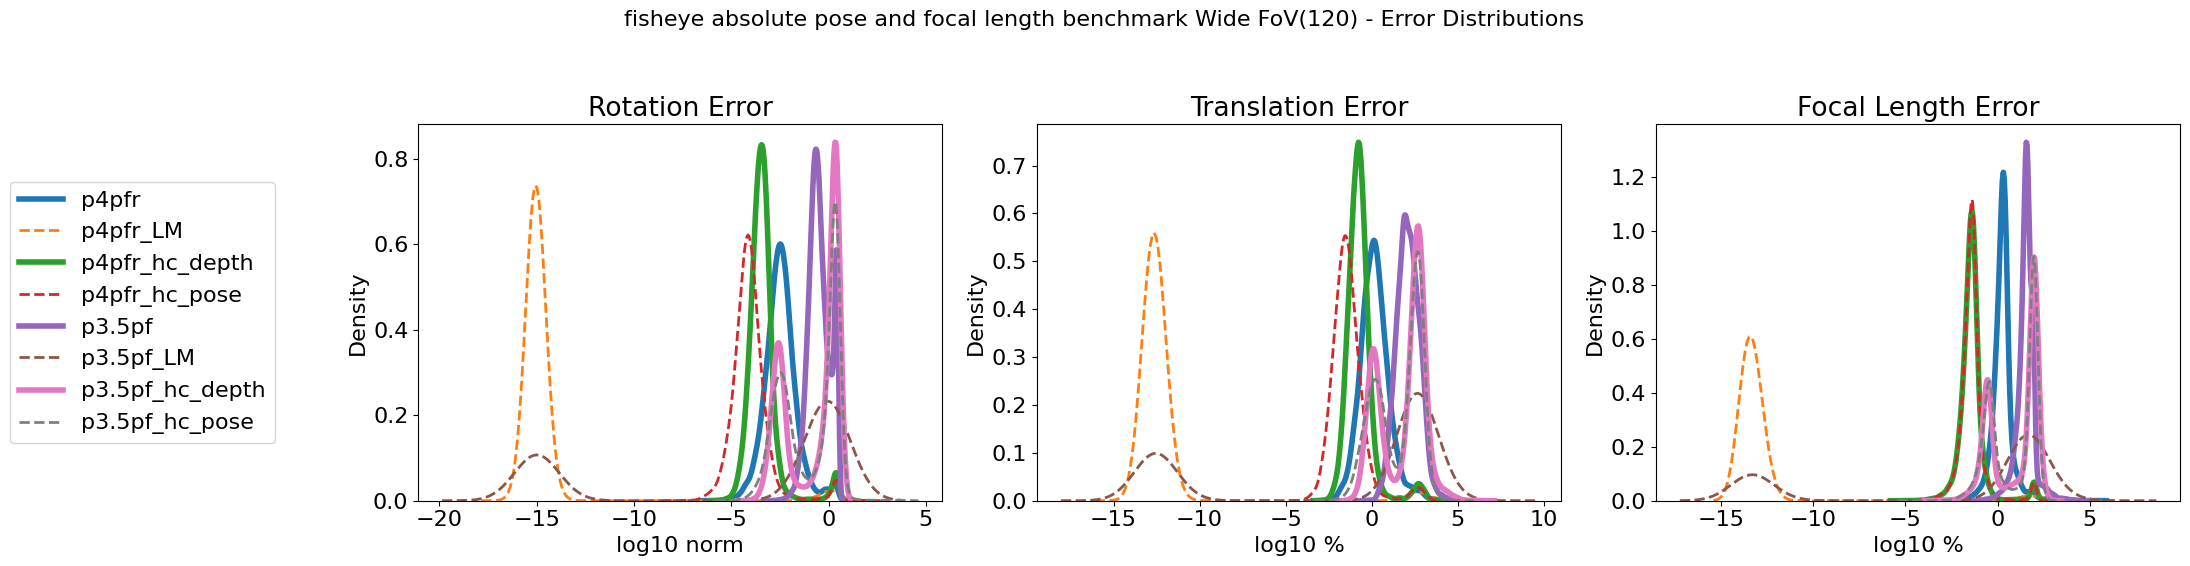

In [37]:
present_IDs = [0, 1, 2, 3, 4, 5, 6, 7]
# present_IDs = [0, 1, 2, 3, 8, 9, 10, 11]
solver_names = [solver_names_all[i] for i in present_IDs]
solver_names_legend = [solver_names_legend_all[i] for i in present_IDs]
plotErrorDistributions(FoVWide, 'Wide FoV(120)', solver_names, solver_names_legend, solver_colors, line_widths, curve_styles)

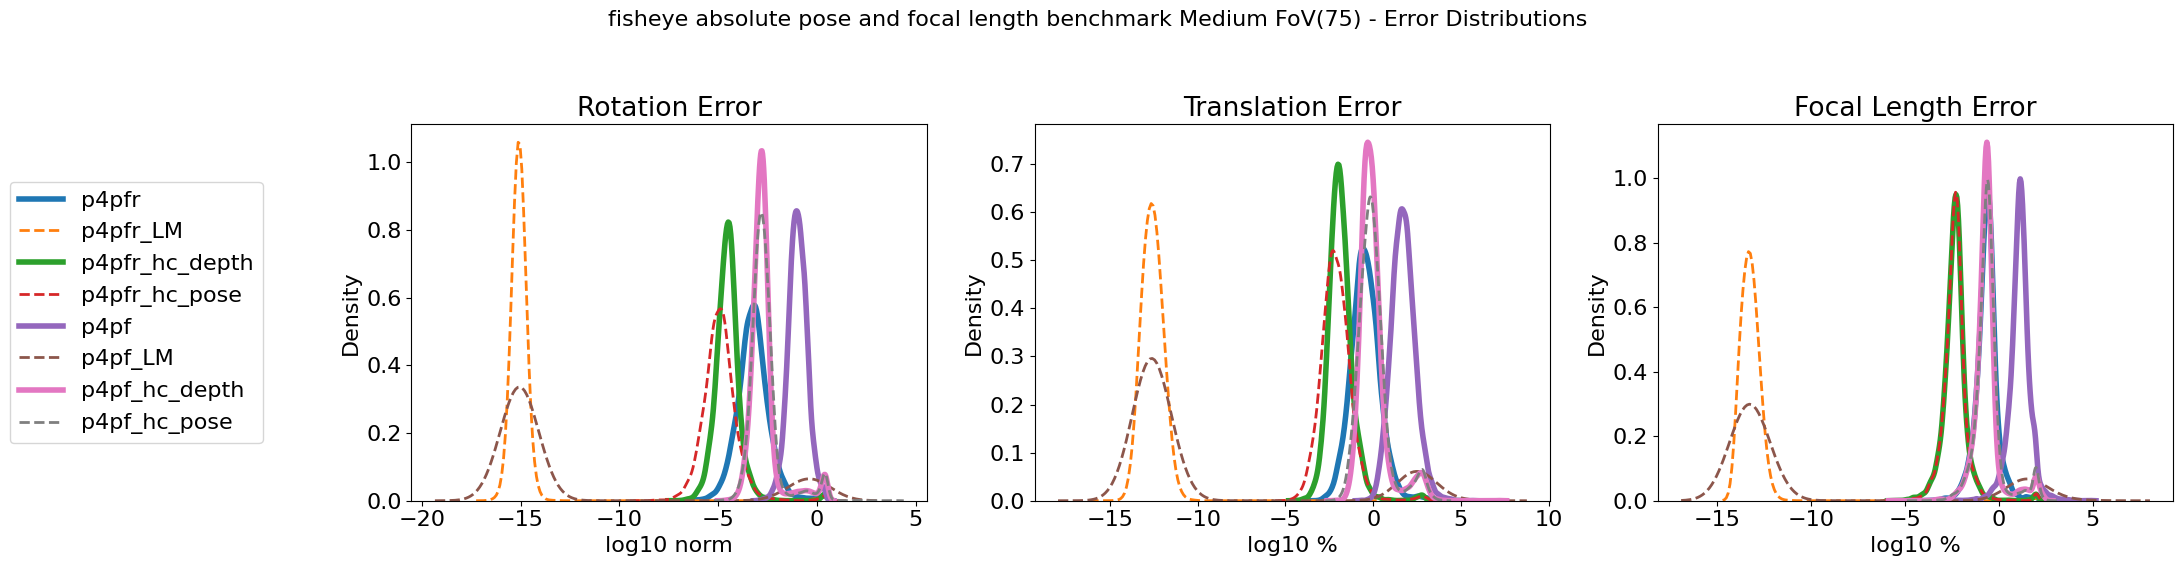

In [38]:
present_IDs = [0, 1, 2, 3, 8, 9, 10, 11]
solver_names = [solver_names_all[i] for i in present_IDs]
solver_names_legend = [solver_names_legend_all[i] for i in present_IDs]
plotErrorDistributions(FoVMedium, 'Medium FoV(75)', solver_names, solver_names_legend, solver_colors, line_widths, curve_styles)

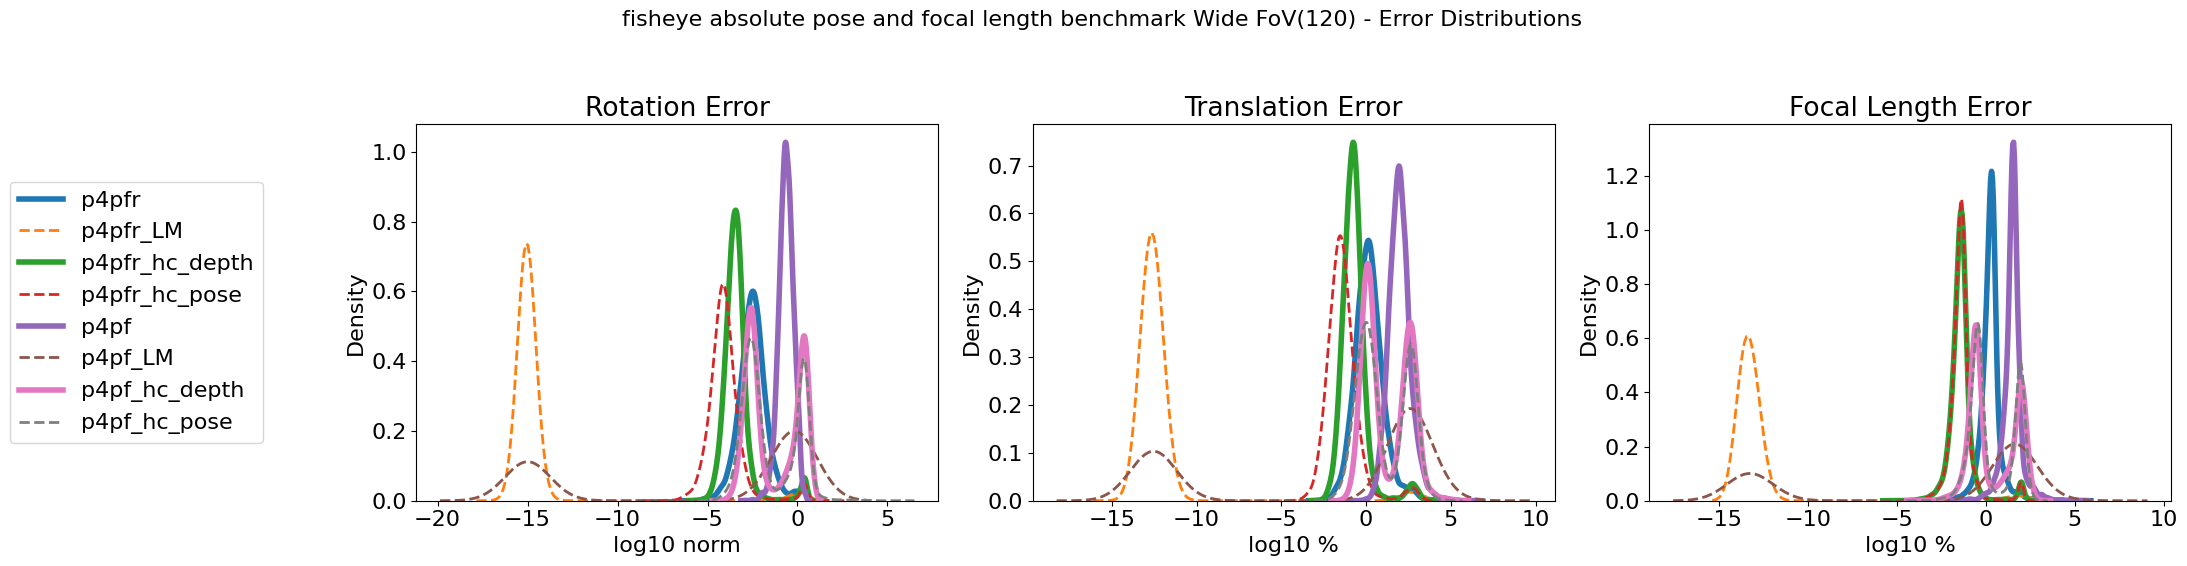

In [39]:
# present_IDs = [0, 1, 2, 3, 4, 5, 6, 7]
present_IDs = [0, 1, 2, 3, 8, 9, 10, 11]
solver_names = [solver_names_all[i] for i in present_IDs]
solver_names_legend = [solver_names_legend_all[i] for i in present_IDs]
plotErrorDistributions(FoVWide, 'Wide FoV(120)', solver_names, solver_names_legend, solver_colors, line_widths, curve_styles)